In [1]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
from gcforest.gcforest import GCForest
import matplotlib.pyplot as  plt
import warnings
warnings.filterwarnings("ignore")
def get_toy_config():#生成级联结构的相关结构
    config = {}
    ca_config = {}
    ca_config["random_state"] = 0# 0 or 1
    ca_config["max_layers"] = 100 #最大的层数
    ca_config["early_stopping_rounds"] = 3 #如果出现某层的三层以内的准确率都没有提升，层中止
    ca_config["n_classes"] = 3
    ca_config["estimators"] = []
    ca_config["estimators"].append( {"n_folds": 5, "type": "XGBClassifier", "n_estimators": 10, "max_depth": 5,
             "objective": "multi:softprob", "silent": True, "nthread": -1, "learning_rate": 0.1} )
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "n_estimators": 10, "max_depth": None, "n_jobs": -1})
    ca_config["estimators"].append({"n_folds": 5, "type": "ExtraTreesClassifier", "n_estimators": 10, "max_depth": None, "n_jobs": -1})
    ca_config["estimators"].append({"n_folds": 5, "type": "LogisticRegression"})
    #共使用了四个基学习器
    config["cascade"] = ca_config
    return config

#或者写个json,用load_json()方法加载


F:\python\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=60)
config=get_toy_config()
gc = GCForest(config) 
X_train_enc = gc.fit_transform(X_train,Y_train)
y_pred = gc.predict(X_test)


[ 2020-03-26 13:47:38,957][cascade_classifier.fit_transform] X_groups_train.shape=[(120, 4)],y_train.shape=(120,),X_groups_test.shape=no_test,y_test.shape=no_test
[ 2020-03-26 13:47:38,960][cascade_classifier.fit_transform] group_dims=[4]
[ 2020-03-26 13:47:38,961][cascade_classifier.fit_transform] group_starts=[0]
[ 2020-03-26 13:47:38,962][cascade_classifier.fit_transform] group_ends=[4]
[ 2020-03-26 13:47:38,964][cascade_classifier.fit_transform] X_train.shape=(120, 4),X_test.shape=(0, 4)
[ 2020-03-26 13:47:38,965][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(120, 4), X_cur_test.shape=(0, 4)
[ 2020-03-26 13:47:44,416][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_0.predict)=92.00%
[ 2020-03-26 13:47:44,460][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_1.predict)=100.00%
[ 2020-03-26 13:47:44,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_2.predic

[ 2020-03-26 13:47:51,392][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_3.predict)=100.00%
[ 2020-03-26 13:47:51,615][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_4.predict)=91.30%
[ 2020-03-26 13:47:51,617][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_cv.predict)=95.00%
[ 2020-03-26 13:47:51,838][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_0.predict)=100.00%
[ 2020-03-26 13:47:52,050][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_1.predict)=88.00%
[ 2020-03-26 13:47:52,261][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_2.predict)=95.83%
[ 2020-03-26 13:47:52,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_3.predict)=91.30%
[ 2020-03-26 13:47:52,686][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_4.predict)=95.65%
[ 202

[ 2020-03-26 13:47:57,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_3 - 5_folds.train_cv.predict)=95.00%
[ 2020-03-26 13:47:57,395][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=94.17%
[ 2020-03-26 13:47:57,396][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=2, accuracy_train=96.67%, accuracy_test=0.00%
[ 2020-03-26 13:47:57,398][cascade_classifier.transform] X_groups_test.shape=[(30, 4)]
[ 2020-03-26 13:47:57,399][cascade_classifier.transform] group_dims=[4]
[ 2020-03-26 13:47:57,400][cascade_classifier.transform] X_test.shape=(30, 4)
[ 2020-03-26 13:47:57,402][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(30, 4)
[ 2020-03-26 13:47:58,487][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(30, 16)


In [3]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_pred)
print("Test Accuracy 's X_encode = {:.2f} %".format(acc * 100))

Test Accuracy 's X_encode = 90.00 %


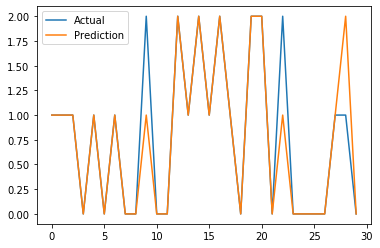

In [4]:
plt.plot(Y_test,label='Actual')
plt.plot(y_pred,label='Prediction')
plt.legend()